# Psych 255A Final Project
### Adriana Mendez Leal 

## Project Description and Introduction

   For this project, I chose to focus my psychometric analysis on the Right-Wing Authoritarianism (RWA) Scale developed by Bob Altemeyer in 1981 and updated in 2007. This measure attempts to capture the tendency to be an authoritarian follower (a person who is likely to support authoritarian leaders). In this case, the term "right wing" is not meant to refer to a specific political belief system but instead to submission to traditional authority figures and conventions. Similarly, Altemeyer argues that the measure captures an underlying personality trait that is associated with submission to the legitimate establishment, aggression on behalf of authority, and conventionalism (Altemeyer, 2007). 
   
   The RWAS consists of 20 items (half reverse-coded) that use a 9 point Likert scale,  where for positively scored items endorsement of a 1 indicates less of a tendency for authoritarian following and endorsement of a 9 indicates greater following susceptability. Participants are given 2 practice questions, where they asked to agree or disagree with statements, and then complete the rest of the measure independently. The full questionnaire is included at the end of this notebook. Sample items include:

   - " Our country will be great if we honor the ways of our forefathers, do what the authorities tell us to do, and get rid of the “rotten apples” who are ruining everything"
   - "What our country really needs is a strong, determined leader who will crush evil, and take us back to our true path."

The RWAS has been widely used in political psychology since its development and has since been adapted for use in various contexts in the field. It is considered by many to be the gold-standard assessment of authoritarianism, and has also seen a resurgence in recent years. 

Most analyses of this scale treat it as a undimensional measure. However, some scholars (e.g. Finke, 2005) have found evidence that the three theoretical subdomains, submission, aggression on behalf of authority, and conventionalism (not hypothesized as structural subdomains) may load onto 3 different factors. For the purposes of this project, I evaluate both approaches. 

### Dataset
This analysis was conducted via an online survey on a sample of 9876 participants (63.163% males, 34.68% females, .019% other; mean age 31.68, range 13-99). As a result, there are a large number of discrepancies and unusual values sprinkled throughout the responses, and there may still be anomalies in the data that I couldn't detect with the available information. 


## Preliminary Analyses

I first cleaned the RWAS data, then loaded them and reverse coded values as appropriate:

In [ ]:
# load relevant libraries
library(psych)
library(parallel)
library(GPArotation)
library(lavaan)
library(mirt)
library(graphics)
.libPaths('C:/Users/amend/OneDrive/Documents/R/win-library/3.5')

In [ ]:
# read in the RWAS question list
rwas_questions <- read.csv(file="C:\\Users\\amend\\Downloads\\RWAS\\RWAS\\RWAS_questions.csv", header=TRUE, sep=",")

# read in the precleaned RWAS data and reverse score appropriately
full_dataset<- read.csv(file="C:\\Users\\amend\\Downloads\\RWAS\\RWAS\\data.csv", header=TRUE, sep=",")

# pull out just the RWAS, dropping the first 2 questions as Altemeyer recommends
rwas <- full_dataset[ ,3:22]

# replace missing values with NA, remove empty rows
rwas[rwas==0]<-NA

# reverse score the appropriate questions
cols = c('Q4','Q6','Q8','Q9','Q11','Q13','Q15','Q18','Q20','Q21')
rwas_w_rev <-rwas
rwas_w_rev [,cols]<- 10 - rwas[,cols]

### Pearson Correlation Matrix
A plot of the Pearson correlation matrix for all the questionnaire items is included below:

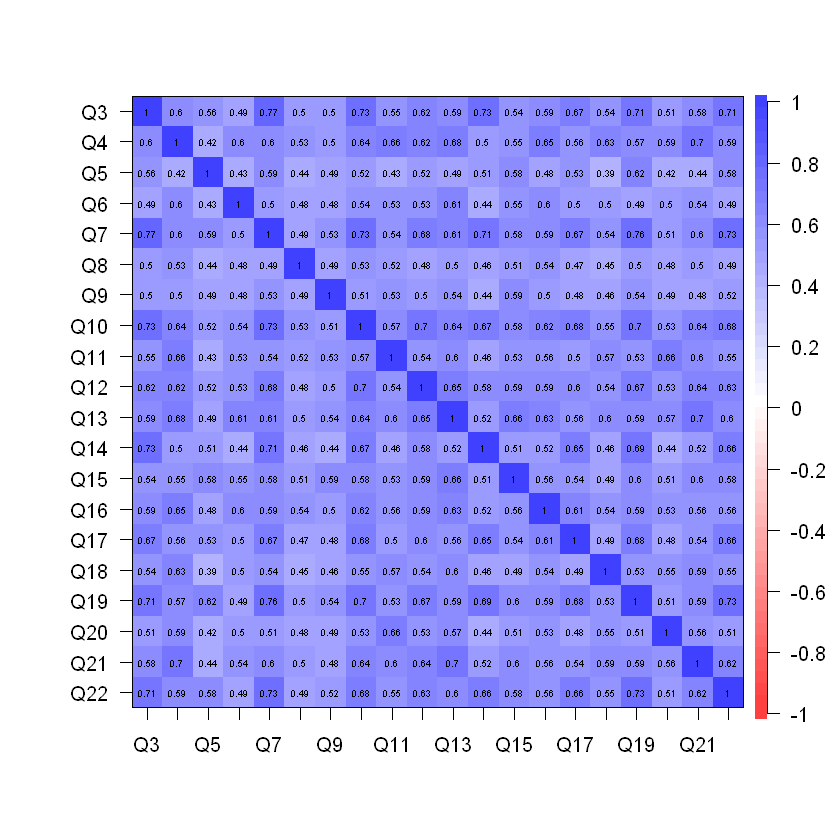

In [170]:
# compute and plot the Pearson correlation matrix for the cleaned data
pearson_cor <- round(cor(rwas_w_rev, method = "pearson", use = "na.or.complete"),2)
corPlot(pearson_cor, numbers = TRUE)

### Polychoric Correlation Matrix
A plot of the polychoric interitem correlation matrix is shown below:

Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
"1 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully."

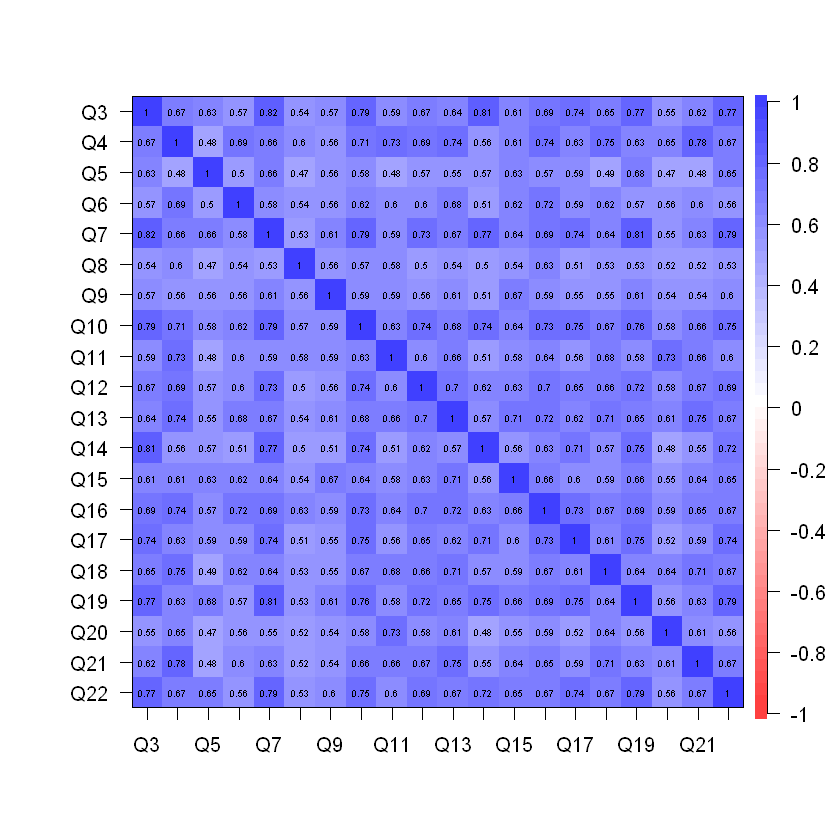

In [172]:
# compute and plot the polychoric correlation matrix
pc <- polychoric_AML(x=rwas_w_rev,smooth=TRUE)
invisible(round(pc$rho,2))
invisible(round(pc$tau,2))
corPlot(pc$rho, numbers=TRUE)

The majority of items on this scale appear to be fairly highly correlated with each other: the lowest inter-item correlation here is .46.Item 8 also appears to have a smaller than average correlation with most other items.

Questions Q3, Q7, Q14, Q19, Q22 are all highly correlated with each other (with Q10 and Q14 slightly less highly correlated with each of these) and we can see that these questions overlap greatly in terms of content:
 
##### Q3 and Q7 (r =.82).
- Q3: "Our country desperately needs a mighty leader who will do what has to be done to destroy the radical new ways and sinfulness that are ruining us.'
- Q7:"The only way our country can get through the crisis ahead is to get back to our traditional values, put some tough leaders in power, and silence the troublemakers spreading bad ideas."
   
   
##### Q3 and Q14 (r = .81).
- Q14: "What our country really needs is a strong, determined leader who will crush evil, and take us back to our true path."
   
   
##### Q7 and Q22 (r= .81).
- Q22:This country would work a lot better if certain groups of troublemakers would just shut up and accept their group’s traditional place in society.
   
   
##### Q7 and Q19 ( r= .81),
- Q19: Our country will be great if we honor the ways of our forefathers, do what the authorities tell us to do, and get rid of the “rotten apples” who are ruining everything. 
   
   
#####  Q3 and Q10 ( r = .79)
- Q10: Our country will be destroyed someday if we do not smash the perversions eating away at our moral fiber and traditional beliefs. 
   
     
##### Q19 and Q22 (r = .79)
##### Q7 and Q10 ( r = .79)
 
 

### Cluster Analysis Using IClust

Using iclust, we see a similar pattern to what we saw above. There appear to be 2 clusters of items that produce alphas that are nearly as good as the full set. These appear to reflect the standard-coded items (the ones described above, primarily) and the reverse-coded items, for the most part (with some exceptions), minus question 8 and question 5 ("It is always better to trust the judgment of the proper authorities in government and religion than to listen to the noisy rabble-rousers in our society who are trying to create doubt in people’s minds"). The clusters do not appear to reflect any underlying subdomains

ICLUST (Item Cluster Analysis)
Call: iclust(r.mat = pc$rho, nclusters = 1)

Purified Alpha:
[1] 0.97

G6* reliability:
[1] 1

Original Beta:
[1] 0.83

Cluster size:
[1] 20

Item by Cluster Structure matrix:
    [,1]
Q3  0.85
Q4  0.84
Q5  0.70
Q6  0.75
Q7  0.86
Q8  0.67
Q9  0.72
Q10 0.86
Q11 0.77
Q12 0.81
Q13 0.83
Q14 0.78
Q15 0.78
Q16 0.85
Q17 0.81
Q18 0.80
Q19 0.85
Q20 0.72
Q21 0.80
Q22 0.85

With eigenvalues of:
[1] 13

Purified scale intercorrelations
 reliabilities on diagonal
 correlations corrected for attenuation above diagonal: 
     [,1]
[1,] 0.97

Cluster fit =  0.98   Pattern fit =  0.99  RMSR =  0.05 

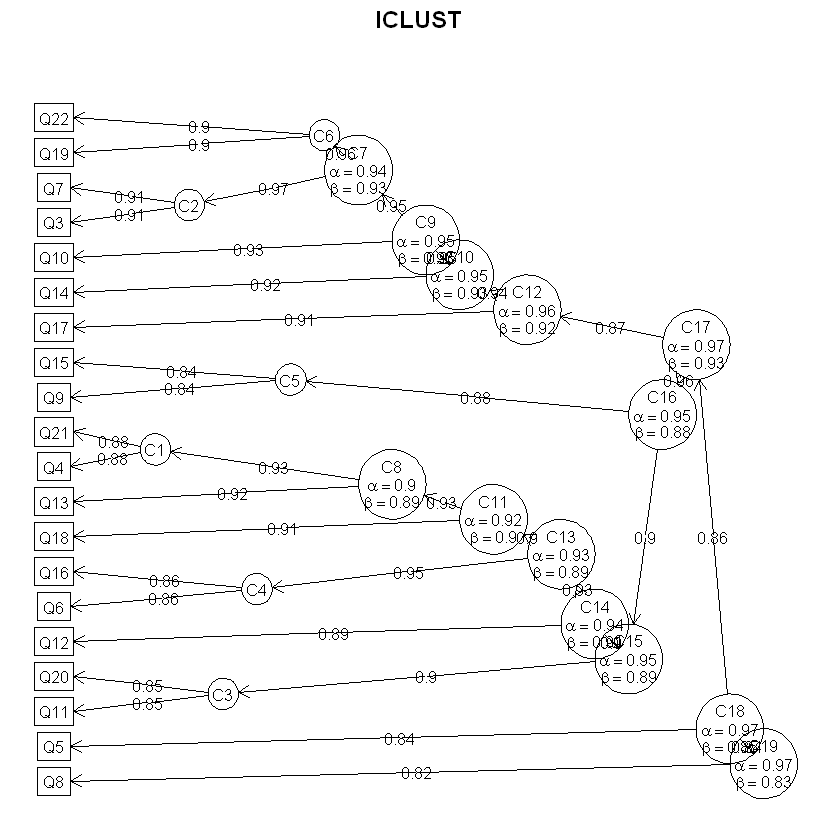

In [174]:
iclust(pc$rho, 1)

### Examining Hierarchical Structure with BassAckward

Next, I looked at hierachical structures in this dataset using BassAckward, with 2,3, and 4 levels. 
At 2 levels, the lower level factors are, again, just the forward and reverse coded items. At 3 levels, there are 3 lower level subdomains with reasonable loadings that suggest there may be a subdomain related to submission to authority, as posited, but the crossloadings make interpretation difficult (same story with the 4 level model). These models suggest this scale is probably unidimensional and there are no substantive subscales, but we'll keep looking at the dimensionality regardless.


Call: bassAckward(r = pc$rho, nfactors = 2)

 1 F1
 2 F1
Use print with the short = FALSE option to see the correlations, or use the summary command.

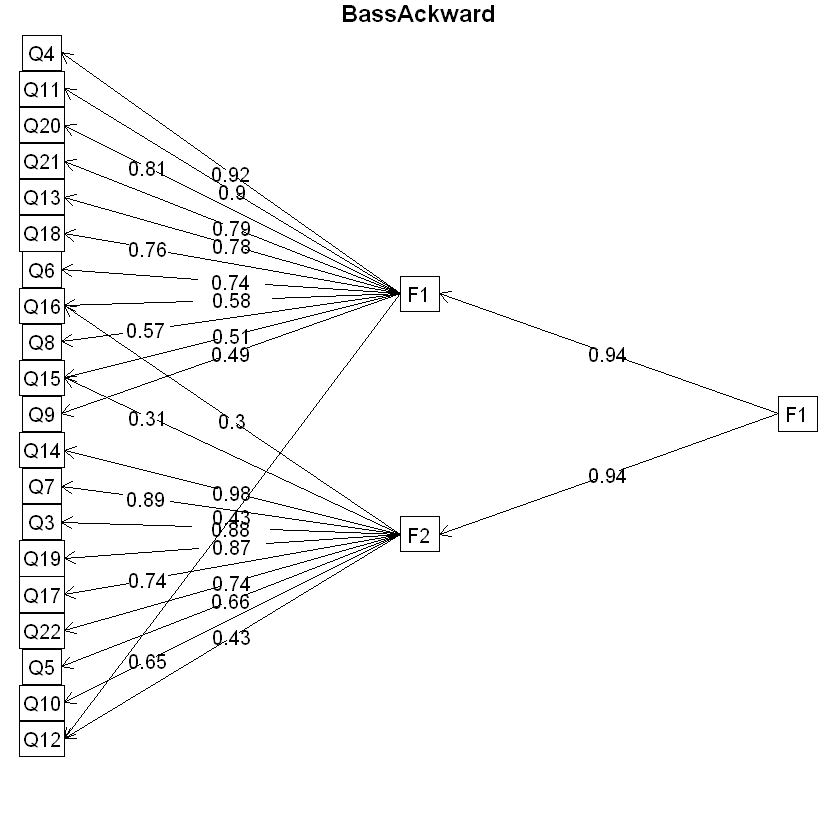

In [277]:
bassAckward(pc$rho,2)


Call: bassAckward(r = pc$rho, nfactors = 3)

 1 F1
 2 F1
 3 F1 F2
Use print with the short = FALSE option to see the correlations, or use the summary command.

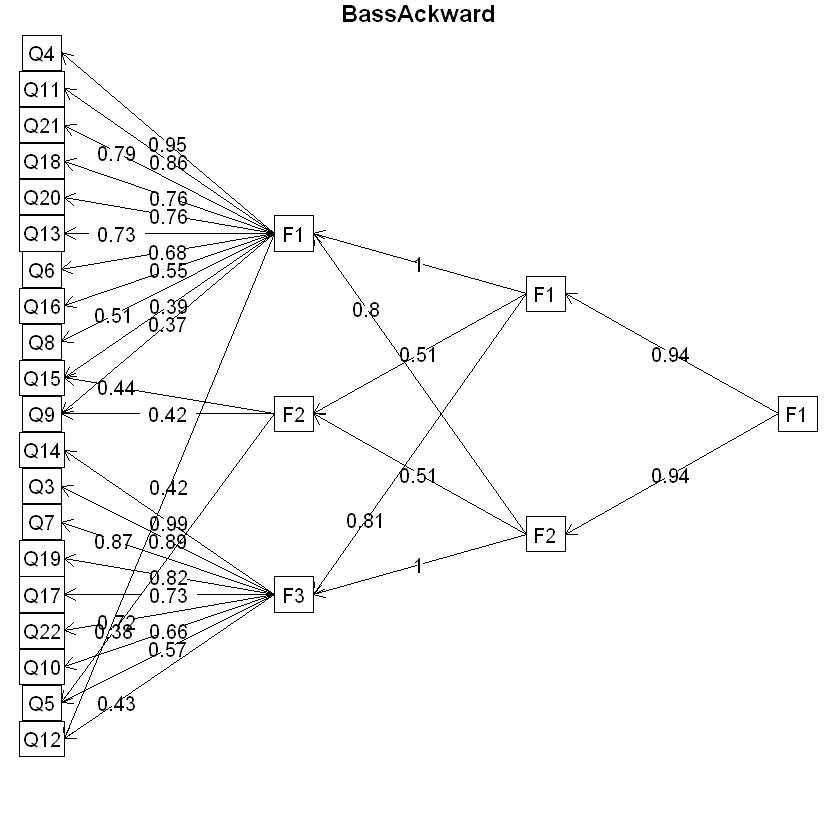

In [278]:
bassAckward(pc$rho,3)


Call: bassAckward(r = pc$rho, nfactors = 4)

 1 F1
 2 F1
 3 F1 F2
 4 F2 F1 F4
Use print with the short = FALSE option to see the correlations, or use the summary command.

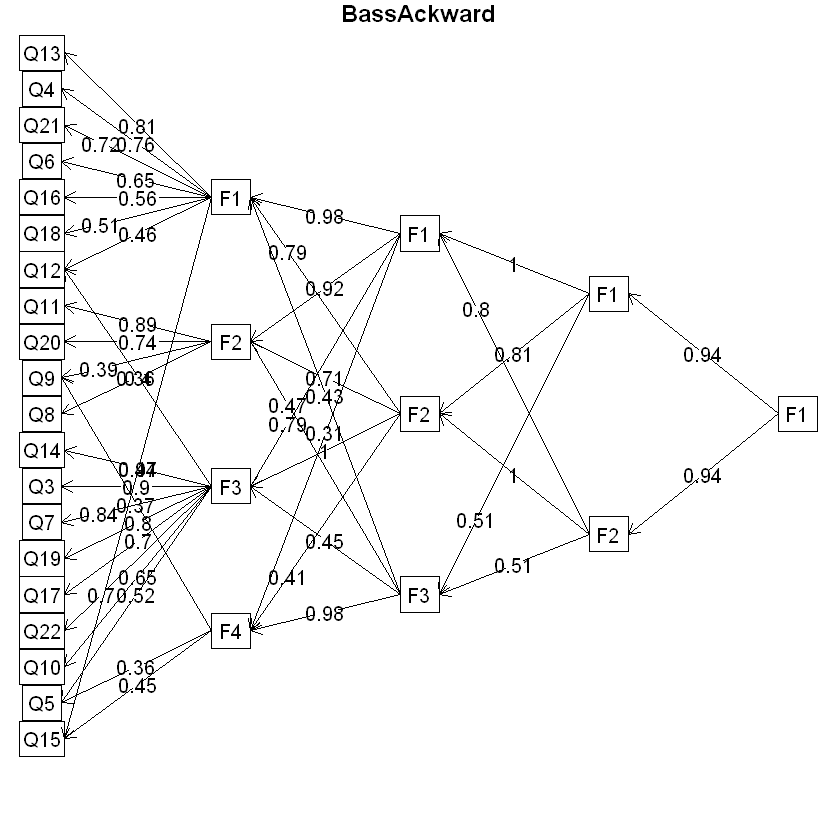

In [279]:
bassAckward(pc$rho,4)


Call: bassAckward(r = pc$rho, nfactors = 2)

 1 F1
 2 F1
Use print with the short = FALSE option to see the correlations, or use the summary command.

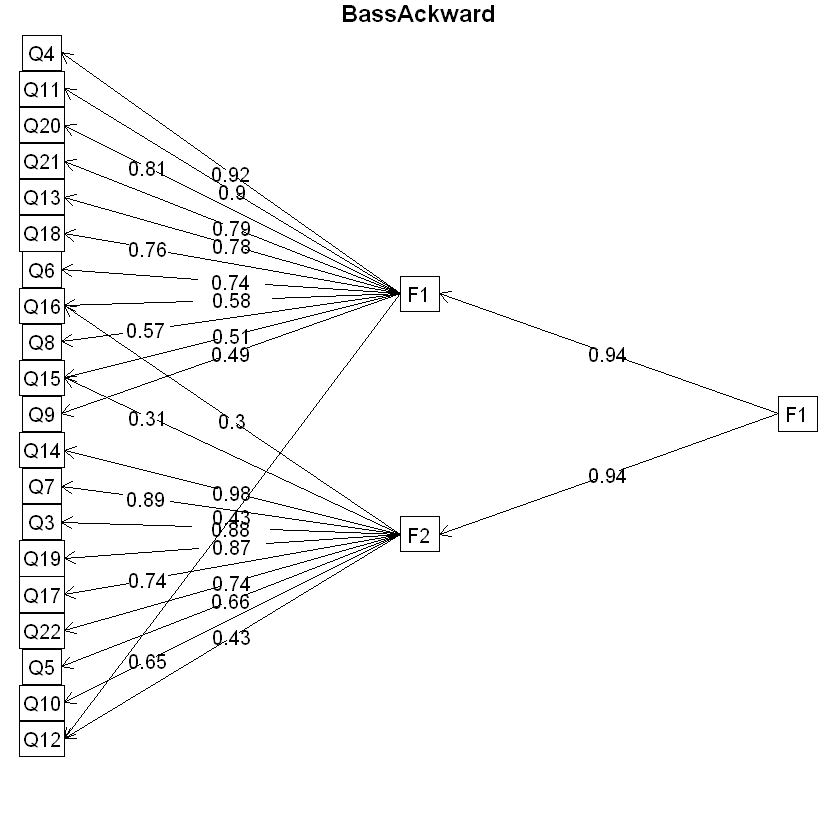

In [152]:
bassAckward(pc$rho,2)


Call: bassAckward(r = pc$rho, nfactors = 4)

 1 F1
 2 F1
 3 F1 F2
 4 F2 F1 F4
Use print with the short = FALSE option to see the correlations, or use the summary command.

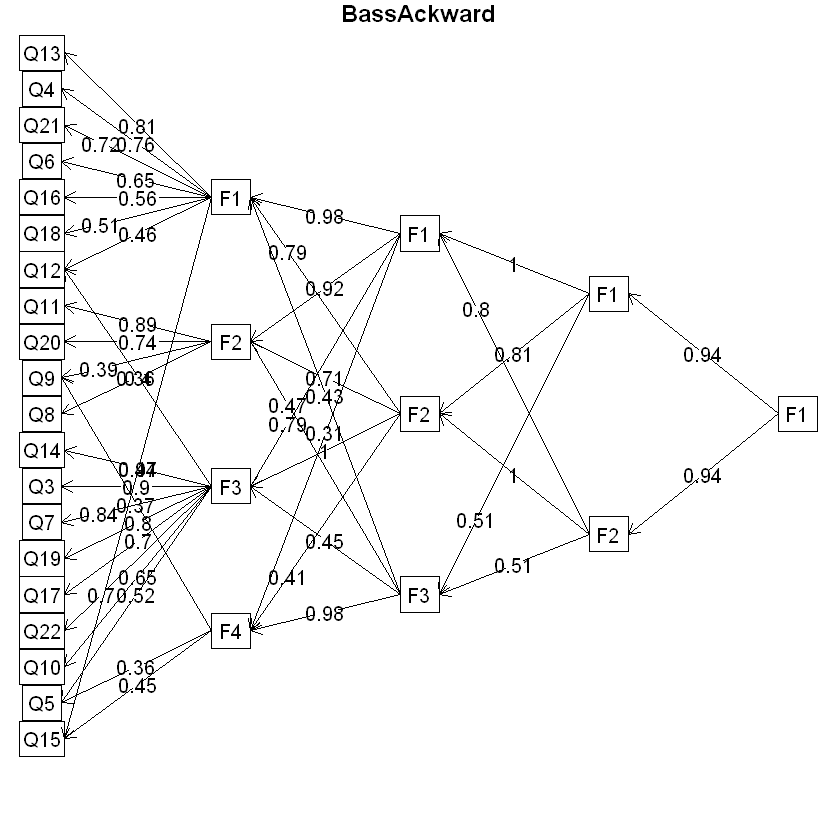

In [153]:
bassAckward(pc$rho,4)

# Item and Test Psychometrics
### Part 1: Cronbach's Alpha and Item-Level Statistics
In order to evaluate the reliability of this measure (since it appears to be substantively unidimensional), I used Cronbach's alpha. In addition, I examined the relationships between individual items and overall score, and recorded the frequencies of each Likert scale response to examine possible patterns. 

In [154]:
alpha_output <-alpha(rwas_w_rev)

# output total statistics
alpha_output$total

raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd,median_r
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9623791,0.9624655,0.9660398,0.5618084,25.64214,0.0005376585,2.865766,1.808706,0.549532


Alpha is .962, although this is likely a result of the many highly correlated/similar items on this relatively long scale. 

In [155]:
# get item with maximum corrected correlation with total test
'Item with maximum corrected correlation with total test'
paste(row.names(alpha_output$item.stats)[which.max(alpha_output$item.stats$r.cor)], ":",
      rwas_questions[1,row.names(alpha_output$item.stats)[which.max(alpha_output$item.stats$r.cor)]], sep = "", 
      collapse = NULL)
paste('r corrected = ', round(max(alpha_output$item.stats$r.cor),3))

[1] "Item with maximum corrected correlation with total test"

[1] "Q7:The only way our country can get through the crisis ahead is to get back to our traditional values, put some tough leaders in power, and silence the troublemakers spreading bad ideas. "

[1] "r corrected =  0.828"

In [156]:
# get items with lowest corrected correlation with total test
'Item with lowest corrected correlation with total test'
paste(row.names(alpha_output$item.stats)[which.min(alpha_output$item.stats$r.cor)], ':',
      rwas_questions[1,row.names(alpha_output$item.stats)[which.min(alpha_output$item.stats$r.cor)]])
paste('r corrected = ', round(min(alpha_output$item.stats$r.cor),3))

[1] "Item with lowest corrected correlation with total test"

[1] "Q8 : There is absolutely nothing wrong with nudist camps. "

[1] "r corrected =  0.651"

In [157]:
# get item with highest mean rating
'Item with highest average rating ("most authoritarian"):'
paste(row.names(alpha_output$item.stats)[which.max(alpha_output$item.stats$mean)],
      rwas_questions[1,row.names(alpha_output$item.stats)[which.max(alpha_output$item.stats$mean)]])
paste('Mean Rating = ', round(max(alpha_output$item.stats$mean),3))

[1] "Item with highest average rating (\"most authoritarian\"):"

[1] "Q21 Homosexuals and feminists should be praised for being brave enough to defy “traditional family values. "

[1] "Mean Rating =  3.725"

In [158]:
# get item with lowest mean rating
'Item with the lowest average rating:'
paste(row.names(alpha_output$item.stats)[which.min(alpha_output$item.stats$mean)],
      rwas_questions[1,row.names(alpha_output$item.stats)[which.min(alpha_output$item.stats$mean)]])
paste('Mean Rating = ', round(min(alpha_output$item.stats$mean),3))

[1] "Item with the lowest average rating:"

[1] "Q18 A “woman’s place” should be wherever she wants to be. The days when women are submissive to their husbands and social conventions belong strictly in the past. "

[1] "Mean Rating =  2.132"

In [159]:
# print out the average frequency of each response type across items
'Average Frequency of Each Response Type Across Items:'
t(colMeans(alpha_output$response.freq))

[1] "Average Frequency of Each Response Type Across Items:"

1,2,3,4,5,6,7,8,9,miss
0.4370418,0.1828994,0.1005442,0.05466854,0.05696371,0.04906727,0.03769287,0.03090009,0.05022211,0.001174565


Summary:

The overall reliability (raw_alpha) is .96. 
- Question 7 ("The only way our country can get through the crisis ahead is to get back to our traditional values, put some tough leaders in power, and silence the troublemakers spreading bad ideas.") has the highest corrected correlation with the overall test (.828), which is consistent with the findings from above.
- Question 8 ("There is absolutely nothing wrong with nudist camps") has the lowest correlation with the overall test (.651). 
- Question 18 ("A “woman’s place” should be wherever she wants to be. The days when women are submissive to their husbands and social conventions belong strictly in the past) has the lowest mean rating (least authoritarian) (2.132)
- Question 21 ("Homosexuals and feminists should be praised for being brave enough to defy “traditional family values") has the highest mean rating (3.725). 

Ratings of 1 are by far the most common across items (on average 43.704% of responses across items), followed by 2 (18.289%) and 3 (10.054%).  All responses 4-9 are equally unlikely-- all of these values hover around ~ 5 %, with responses of 8 and 7 as the lowest. Broadly, people in this sample tend to respond to the questions with low authoritarian ratings overall.

### Part 2: Exploratory Factor Analysis

I performed exploratory factor analysis (1 factor) using minimum residual factoring and an oblimin rotation. As shown below, the factor loadings for all of the items are quite high. Question 8 has the lowest loading (.672), and Question 10 ( " Our country will be destroyed someday if we do not smash the perversions eating away at our moral fiber and traditional beliefs") has the highest (.867)  but all other items have loading of .7 or greater:

That said, this model appears to be sub-optimal using common rules of thumb:

- RMSEA is .121
- The Tucker-Lewis Index/NFI is .857
- Although associated chi-square test returns a chi-square of 9968.993 and p < .0000001


In [298]:
# Exploratory Factor Analysis With One Factor
efa_output <-fa(pc$rho, fm="minres", nfactors=1, rotate="Promax", residuals =TRUE, n.obs = nrow(rwas_w_rev))
efa_output$loadings


Loadings:
    MR1  
Q3  0.848
Q4  0.835
Q5  0.698
Q6  0.743
Q7  0.861
Q8  0.672
Q9  0.718
Q10 0.867
Q11 0.765
Q12 0.815
Q13 0.828
Q14 0.774
Q15 0.778
Q16 0.845
Q17 0.812
Q18 0.799
Q19 0.852
Q20 0.713
Q21 0.793
Q22 0.849

                  MR1
SS loadings    12.655
Proportion Var  0.633

In [299]:
round(efa_output$RMSEA[1],3)
paste('Chi square test: chi = ' , round(efa_output$chi,3) , ', p < .000001')
paste(' Tucker-Lewis Index  = ', round(efa_output$TLI,3))

RMSEA 
0.121

[1] "Chi square test: chi =  9963.949 , p < .000001"

[1] " Tucker-Lewis Index  =  0.857"

EFA with 2 factors revealed 2 factors along standard-scoring and reverse scoring lines. These loadings are also high, and the model fit is still sub-optimal but slightly better (RMSEA = .08, TLI = .934)

In [303]:
# Exploratory Factor Analysis With Two Factors
efa_output_2f <-fa(pc$rho, fm="minres", nfactors=2, rotate="Promax", residuals =TRUE, n.obs = nrow(rwas_w_rev))
efa_output_2f$loadings
round(efa_output_2f$RMSEA[1],3)
paste('Chi square test: chi = ' , round(efa_output_2f$chi,3) , ', p < .000001')
paste(' Tucker-Lewis Index  = ', round(efa_output_2f$TLI,3))


Loadings:
    MR1    MR2   
Q3          0.857
Q4   0.914       
Q5          0.639
Q6   0.739       
Q7          0.869
Q8   0.574  0.130
Q9   0.496  0.257
Q10  0.286  0.628
Q11  0.900       
Q12  0.440  0.416
Q13  0.785       
Q14 -0.124  0.954
Q15  0.517  0.299
Q16  0.593  0.293
Q17  0.136  0.724
Q18  0.760       
Q19         0.847
Q20  0.811       
Q21  0.796       
Q22  0.175  0.723

                 MR1   MR2
SS loadings    6.229 5.430
Proportion Var 0.311 0.272
Cumulative Var 0.311 0.583

RMSEA 
0.082

[1] "Chi square test: chi =  2733.458 , p < .000001"

[1] " Tucker-Lewis Index  =  0.934"

Based on the hypothesized 3 subdomains, I also performed EFA with 3 factors, but the cross loadings make interpretation difficult. 

In [304]:
# Exploratory Factor Analysis With Three Factors
efa_output_3f <-fa(pc$rho, fm="minres", nfactors=3, rotate="Promax", residuals =TRUE, n.obs = nrow(rwas_w_rev))
efa_output_3f$loadings
round(efa_output_3f$RMSEA[1],3)
paste('Chi square test: chi = ' , round(efa_output_3f$chi,3) , ', p < .000001')
paste(' Tucker-Lewis Index  = ', round(efa_output_3f$TLI,3))

Warning message in fac(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, :
" A loading greater than abs(1) was detected.  Examine the loadings carefully."


Loadings:
    MR1    MR2    MR3   
Q3   0.126  0.842       
Q4   1.004        -0.194
Q5  -0.244  0.365  0.662
Q6   0.569         0.259
Q7          0.775  0.119
Q8   0.390         0.310
Q9   0.116         0.711
Q10  0.338  0.629       
Q11  0.787         0.118
Q12  0.410  0.388       
Q13  0.634         0.227
Q14         0.925       
Q15  0.115         0.755
Q16  0.499  0.246  0.164
Q17  0.149  0.668       
Q18  0.788  0.151       
Q19         0.703  0.247
Q20  0.682         0.156
Q21  0.791              
Q22  0.142  0.633  0.147

                 MR1   MR2   MR3
SS loadings    4.896 4.298 1.953
Proportion Var 0.245 0.215 0.098
Cumulative Var 0.245 0.460 0.557

RMSEA 
 0.07

[1] "Chi square test: chi =  1434.358 , p < .000001"

[1] " Tucker-Lewis Index  =  0.952"

### Part 3 Confirmatory Factor Analysis:

I performed a confirmatory factor analysis with one factor, using maximum likelihood estimation. Here, the lowest factor loading again applied to Question 8 (.641), and the highest (.839) to Question 7 ("The only way our country can get through the crisis ahead is to get back to our traditional values, put some tough leaders in power, and silence the troublemakers spreading bad ideas."). Again, the fit for this model is sub-optimal: RMSEA is .097, CFI = .895, TLI = .882)

In [162]:
uni.model='factor1 =~  Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 +
Q11 + Q12 + Q13 + Q14 + Q15 + Q16 + Q17 + Q18 + Q19 + Q20 + Q21 + Q22'

fit.uni=lavaan::cfa(data = rwas_w_rev, model=uni.model, std.lv=TRUE, std.ov=TRUE, estimator="ML", missing = 'listwise')
P <- lavaan::parameterEstimates(fit.uni)
P

lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
factor1,=~,Q3,0.8216737,0.008347997,98.42764,0,0.8053119,0.8380355
factor1,=~,Q4,0.7784393,0.008572758,90.80384,0,0.7616371,0.7952416
factor1,=~,Q5,0.6619744,0.009095130,72.78340,0,0.6441483,0.6798006
factor1,=~,Q6,0.6728797,0.009050989,74.34323,0,0.6551401,0.6906193
factor1,=~,Q7,0.8390042,0.008252727,101.66388,0,0.8228292,0.8551793
factor1,=~,Q8,0.6417081,0.009174714,69.94312,0,0.6237260,0.6596902
factor1,=~,Q9,0.6566452,0.009116367,72.02926,0,0.6387774,0.6745129
factor1,=~,Q10,0.8362512,0.008268064,101.14232,0,0.8200461,0.8524563
factor1,=~,Q11,0.7158240,0.008867859,80.72118,0,0.6984433,0.7332047


In [163]:
fitMeasures(fit.uni)

npar                fmin               chisq                  df 
             40.000               0.815           15792.607             170.000 
             pvalue      baseline.chisq         baseline.df     baseline.pvalue 
              0.000          149351.575             190.000               0.000 
                cfi                 tli                nnfi                 rfi 
              0.895               0.883               0.883               0.882 
                nfi                pnfi                 ifi                 rni 
              0.894               0.800               0.895               0.895 
               logl   unrestricted.logl                 aic                 bic 
        -208172.424         -200276.121          416424.849          416711.999 
             ntotal                bic2               rmsea      rmsea.ci.lower 
           9689.000          416584.885               0.097               0.096 
     rmsea.ci.upper        rmsea.pvalue                 rmr          rmr_nomean 
              0.099               0.000               0.047               0.047 
               srmr        srmr_bentler srmr_bentler_nomean                crmr 
              0.047               0.047               0.047               0.049 
        crmr_nomean          srmr_mplus   srmr_mplus_nomean               cn_05 
              0.049               0.047               0.047             124.576 
              cn_01                 gfi                agfi                pgfi 
            133.404               0.798               0.750               0.646 
                mfi                ecvi 
              0.447               1.638

### Part 4: Exploratory Bifactor Modeling

Given all of our findings above, a bifactor model does not appear to be appropriate for substantive reasons. However, because there do appear to be separate clusters for forward and reverse-coded items, I applied an exploratory bifactor model with 2 and 3 factors to adjust for this non-content related "subgroup" variance. However, this attempt produced an error for the 2 factor suggesting one of the factors is the same as the general factor and the model could not be fit.The 3 factor model did have cross loadings and appears to be overfit, but again suggests there may be a subgroup with weak loadings (Q5, Q9, Q15) that is content based around submission to authority.


Three factors are required for identification -- general factor loadings are set to be 1 for group factor 2.
Proceed with caution. 
Think about redoing the analysis with alternative values of the 'option' setting.



Omega 
Call: omega(m = pc$rho, nfactors = 2, n.obs = nrow(rwas_w_rev), option = "second", 
    rotation = "Oblimin")
Alpha:                 0.97 
G.6:                   0.98 
Omega Hierarchical:    0.88 
Omega H asymptotic:    0.9 
Omega Total            0.98 

Schmid Leiman Factor loadings greater than  0.2 
       g   F1* F2*   h2   u2   p2
Q3  0.89           0.80 0.20 1.00
Q4  0.71  0.53     0.78 0.22 0.64
Q5  0.72           0.52 0.48 1.00
Q6  0.64  0.43     0.59 0.41 0.70
Q7  0.91           0.82 0.18 1.00
Q8  0.60  0.33     0.47 0.53 0.77
Q9  0.66  0.28     0.52 0.48 0.85
Q10 0.86           0.77 0.23 0.97
Q11 0.64  0.52     0.68 0.32 0.60
Q12 0.78  0.25     0.66 0.34 0.91
Q13 0.73  0.45     0.73 0.27 0.72
Q14 0.85           0.73 0.27 0.99
Q15 0.72  0.29     0.61 0.39 0.86
Q16 0.78  0.34     0.72 0.28 0.84
Q17 0.83           0.70 0.30 0.99
Q18 0.70  0.44     0.68 0.32 0.72
Q19 0.90           0.80 0.20 1.00
Q20 0.60  0.47     0.58 0.42 0.62
Q21 0.69  0.46     0.68 0.32 0.69
Q22 0.87 

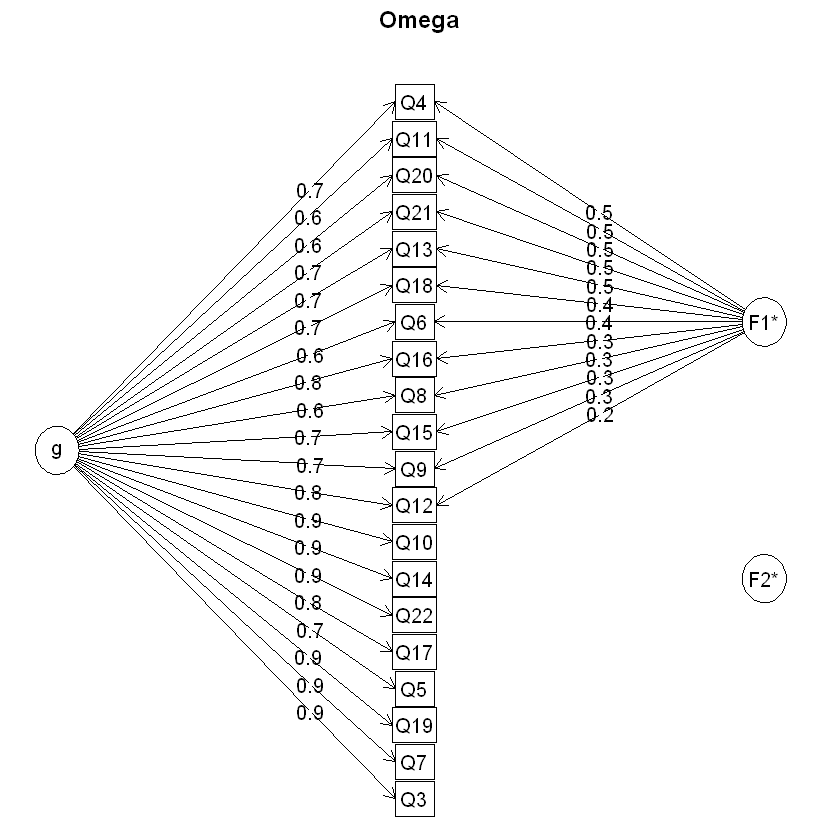

In [316]:
omega(pc$rho, 2,rotation = "Oblimin",option = "second", n.obs = nrow(rwas_w_rev))

Omega 
Call: omega(m = pc$rho, nfactors = 3, n.obs = nrow(rwas_w_rev), option = "second", 
    rotation = "Oblimin")
Alpha:                 0.97 
G.6:                   0.98 
Omega Hierarchical:    0.87 
Omega H asymptotic:    0.89 
Omega Total            0.98 

Schmid Leiman Factor loadings greater than  0.2 
       g   F1*   F2*   F3*   h2   u2   p2
Q3  0.83        0.36       0.82 0.18 0.84
Q4  0.78  0.46             0.83 0.17 0.73
Q5  0.67        0.23  0.33 0.61 0.39 0.74
Q6  0.69  0.33             0.60 0.40 0.79
Q7  0.84        0.35       0.82 0.18 0.85
Q8  0.62  0.25             0.47 0.53 0.82
Q9  0.67              0.36 0.62 0.38 0.73
Q10 0.83        0.27       0.78 0.22 0.88
Q11 0.71  0.42             0.68 0.32 0.74
Q12 0.77  0.20             0.66 0.34 0.89
Q13 0.77  0.35             0.73 0.27 0.81
Q14 0.77        0.40       0.75 0.25 0.78
Q15 0.73              0.38 0.72 0.28 0.74
Q16 0.79  0.27             0.72 0.28 0.87
Q17 0.78        0.30       0.70 0.30 0.87
Q18 0.75  0.37  

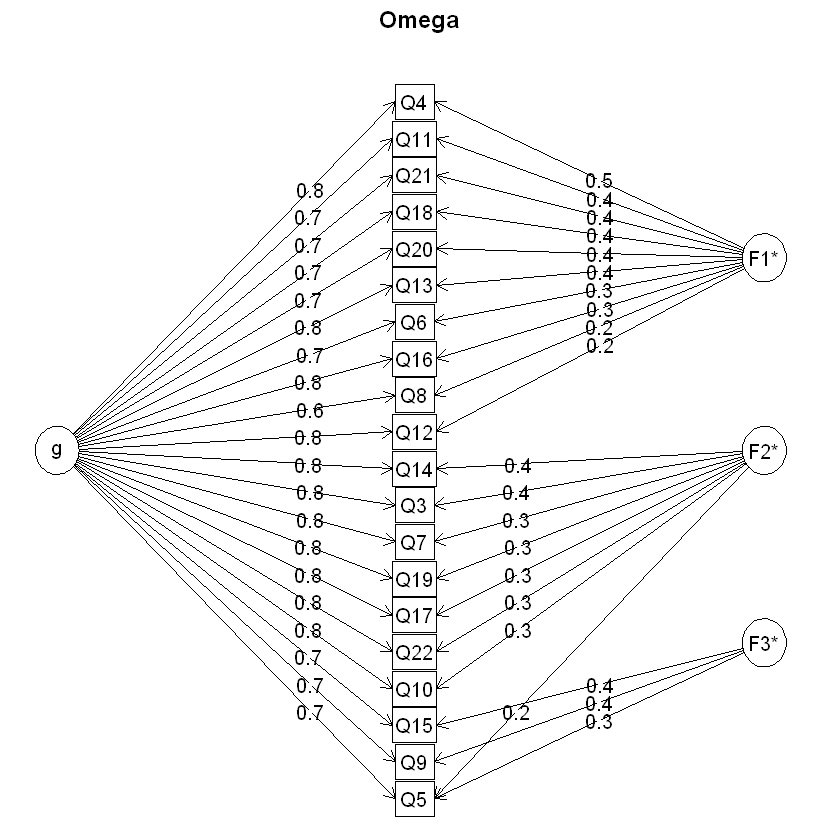

In [317]:
omega(pc$rho, 3,rotation = "Oblimin",option = "second", n.obs = nrow(rwas_w_rev))

## Item Response Theory:
Lastly, I evaluated the measure from an item response theory perspective, using the mirt library. Specifically, I fit a unidimensional graded response model for each item. In order to examine the relationship between the latent trait (theta) and the test information and precision, I graphed these curves for the test overall:

In [ ]:
itemtype <- rep('graded',20)
irt_rwas <- mirt(rwas_w_rev,1,itemtype=itemtype)
plot(irt_rwas, type="infoSE", theta_lim=c(-4,4))

This graph suggests that this test is most informative when theta is not extremely low (below -2) -- or, that this test is most informative for characterizing people who are somewhat or very authoritarian, as compared to people who are not at all authoritarian. Specifically, this graph suggests that this test is most informative and has the smallest standard error when scores on theta are between -1 and 3. 

Next, I examined the slopes for the curves fit for each item, and determined that the most discriminating item is Q10, and the least is Q8. 

In [256]:
min(graded_par)

[1] -0.7819782

In [ ]:
param <- coef(irt_rwas, IRTpars=TRUE)
graded_par <- data.frame(do.call(rbind,param[1:20]))
graded_par
summary(irt_rwas)

Based on the slope values for each item, it appears that Q10 (par.7, the 8th parameter) is the most discriminating item in this dataset (largest slope), and that Q8 (par.5, the 6th parameter) is the least discriminating item (smallest slope). Items 7 and 10 had the highest factor loadings (.889), while item 8 had the lowest (.682).

#### Item Characteristic  and Information Curves for Q10 ("Item 8")

Q10: Our country will be destroyed someday if we do not smash the perversions eating away at our moral fiber and traditional beliefs.

In order to examine item- level dynamics for the most discriminating item, Q10, I plotted the item characteristic and information curves for this question.

The item characteristic curve suggests that in practice, this item is virtually dichotomous. Individuals below 0 on theta (so low on authoritarianism) are extremely likely to choose a score of 1, while individuals above the mean are extremely likely to choose a 9. As theta approaches 0 from either direction, the chance of endorsing a value next to the extreme (2 or 8) increases somewhat. The information curve for this item is consistent with a discriminating question -- the bell curve is tall and narrow, with the majority of the information between theta = -2 and +2. The standard error decreases rapidly as theta increases (likely because responses >3 are so rare). The expected score for the item again suggests that it is functioning similarly to a dichotomous item -- responses for individuals with theta <0 are almost always 1, and then jump to 9 very rapidly once theta turns positive. Essentially, this item suggests people are selecting the extremes -- people largely either very not authoritarian or very authoritarian. Perhaps this item (or the scale in general) could have fewer options.

In [ ]:
itemplot(irt_rwas, 8, type = "trace", theta_lim = c(-4, 4))  

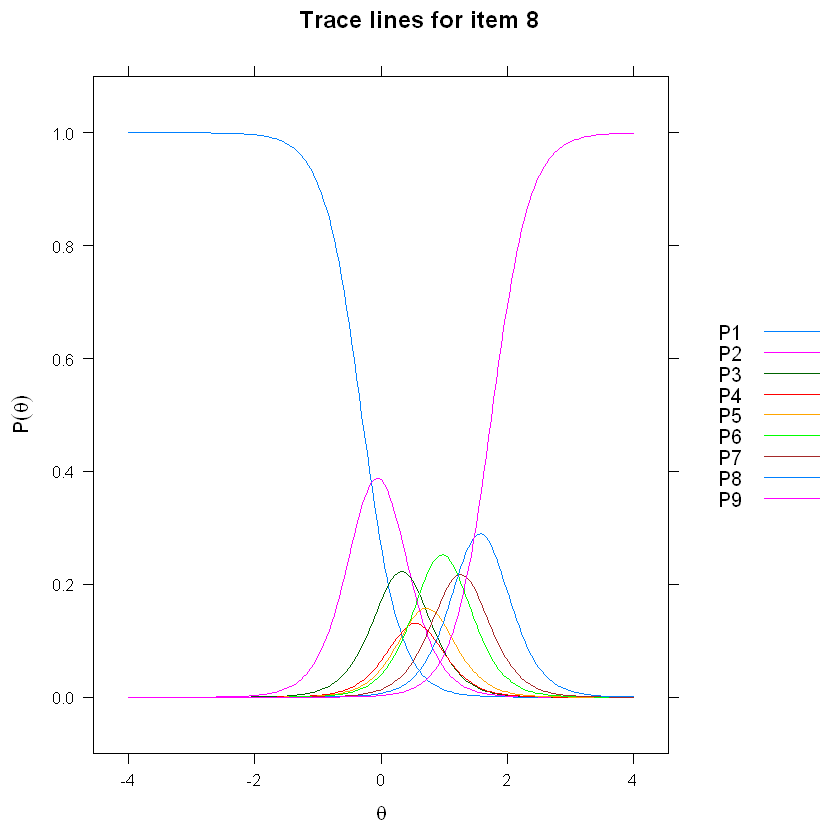

In [264]:
# Category Response Curve Q10
itemplot(irt_rwas, 8, type = "trace", theta_lim = c(-4, 4))  

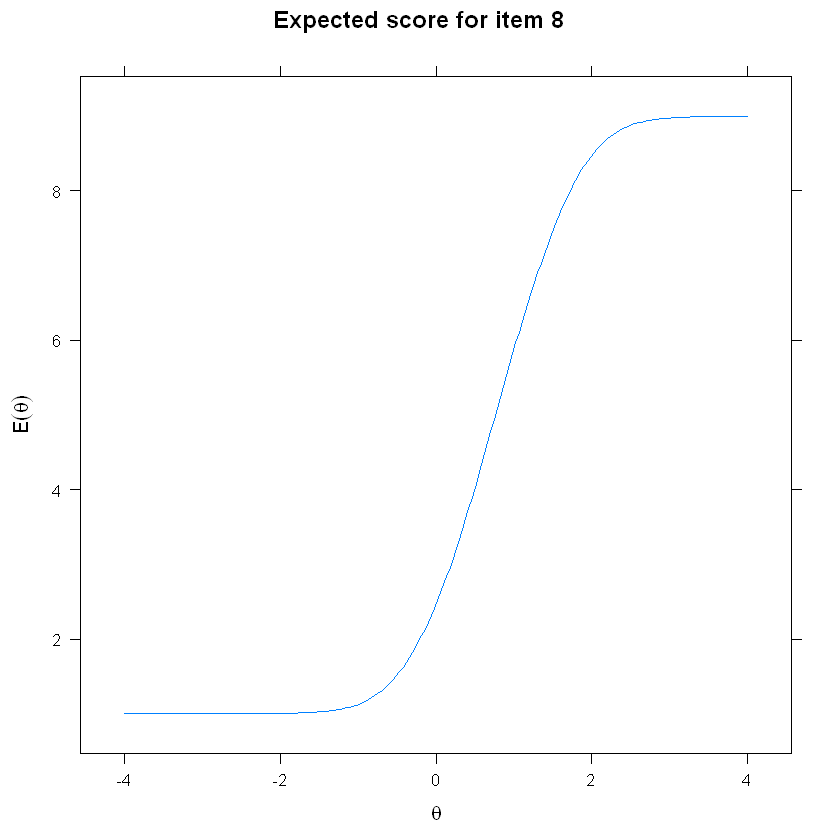

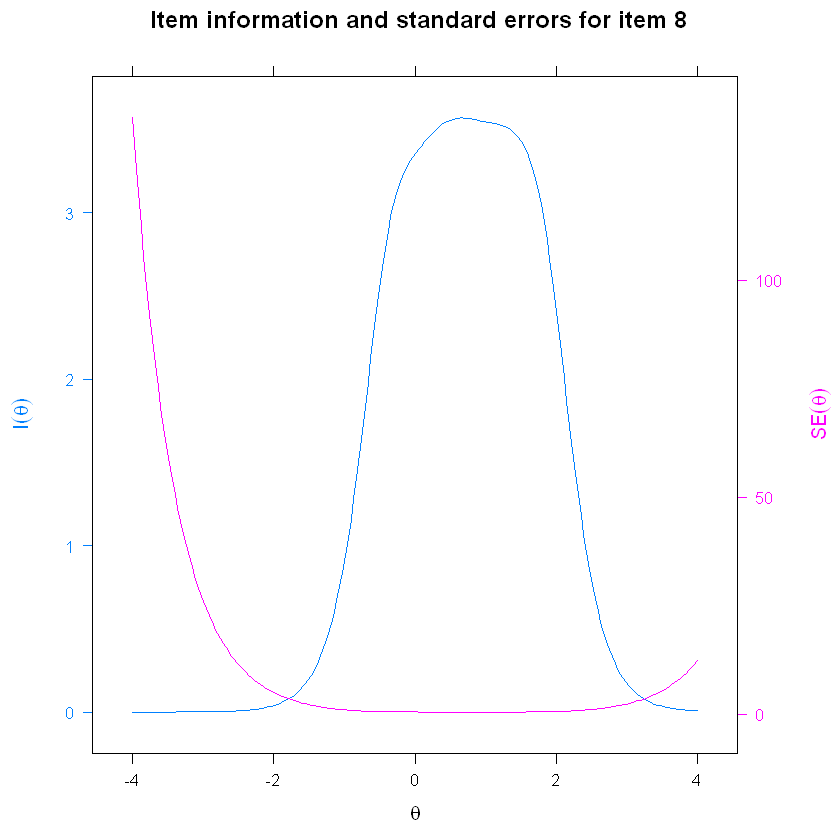

In [267]:
# ScoreCurve Q10
itemplot(irt_rwas, 8, type = "score", theta_lim = c(-4, 4))  
 #Information and SE Curve Q10
itemplot(irt_rwas, 8, type = "infoSE", theta_lim = c(-4, 4)) 

In [ ]:
itemplot(irt_rwas, 7, type = "trace", theta_lim = c(-4, 4))  

#### Item Characteristic  and Information Curves for Q8 ("Item 6")

Q8: There is absolutely nothing wrong with nudist camps. 

For question 8, our least discriminating item, we see that the information function is much broader -- nearly all values of theta provide the same level of information for this item. Additionally, we see that many people select central values, and that for everyone who did not select an extreme (1 or 9), the latent variable theta seems to be largely unrelated to selected scores. 


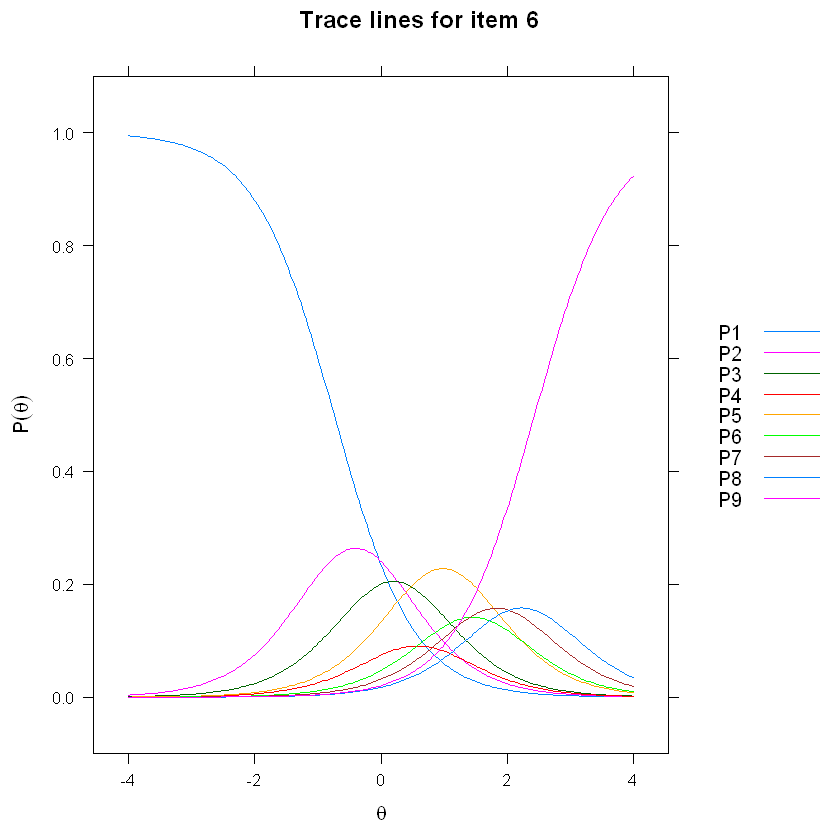

In [269]:
#Information Curve Q8
itemplot(irt_rwas, 6, type = "trace", theta_lim = c(-4, 4))  

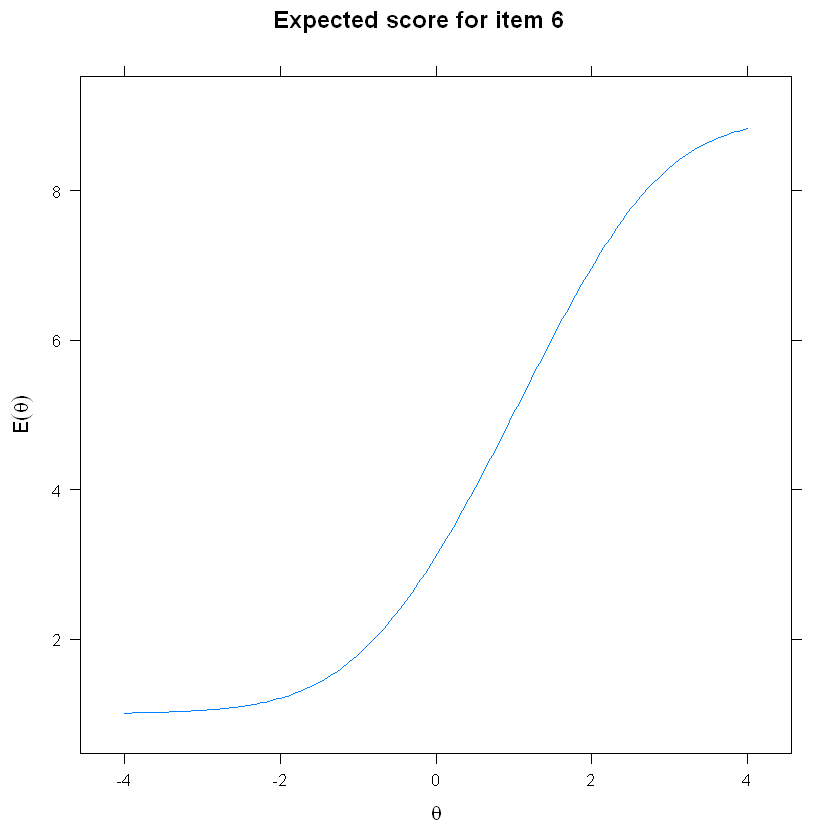

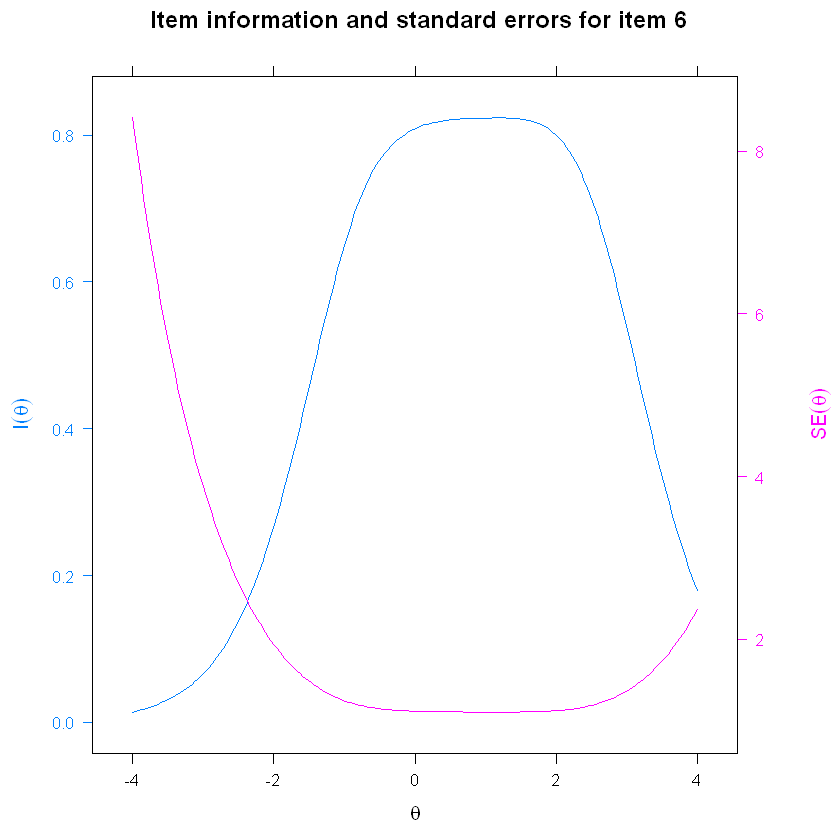

In [271]:
#Information Curve Q8
itemplot(irt_rwas, 6, type = "score", theta_lim = c(-4, 4))  
# Category Response Curve Q8
itemplot(irt_rwas, 6, type = "infoSE", theta_lim = c(-4, 4))  

Based on the IRT outputs, I would argue that a 9-point Likert scale may not add much more value than a smaller one, and could perhaps be reduced (particularly for a 20 item questionnaire). This scale does appear to be undimensional, although I wonder if the differences in findings may be because the group that found the 3 subdomains conducted their research in Germany. 

In addition, based on all of the analyses performed above in addition to the IRT, it seems clear that item 8,  ("There is absolutely nothing wrong with nudist camps.") should be removed from the scale. Frankly, I also wonder if this item is a reflection of a key limitation in the scale -- that many of these items are discriminating because they capture beliefs relative to common social norms, but as times, locations and norms change, they become less meaningful. I wonder if this item would have been more discrimminating in 1981, for example, or if it would still be discriminating in certain cultural contexts. But I digress.

### RWAS Questionnaire:

 1. The established authorities generally turn out to be right about things, while the radicals and protestors are usually just “loud mouths” showing off their ignorance.  
 
2. Women should have to promise to obey their husbands when they get married.  

3. Our country desperately needs a mighty leader who will do what has to be done to destroy the radical new ways and sinfulness that are ruining us.  

4. Gays and lesbians are just as healthy and moral as anybody else.  

5. It is always better to trust the judgment of the proper authorities in government and religion than to listen to the noisy rabble-rousers in our society who are trying to create doubt in people’s minds 

6. Atheists and others who have rebelled against the established religions are no doubt every bit as good and virtuous as those who attend church regularly.  
 
7. The only way our country can get through the crisis ahead is to get back to our traditional values, put some tough leaders in power, and silence the troublemakers spreading bad ideas. 

8. There is absolutely nothing wrong with nudist camps. 

9. Our country needs free thinkers who have the courage to defy traditional ways, even if this upsets many people. 
 
10. Our country will be destroyed someday if we do not smash the perversions eating away at our moral fiber and traditional beliefs. 
 
11. Everyone should have their own lifestyle, religious beliefs, and sexual preferences, even if it makes them different from everyone else.  
 
12. The “old-fashioned ways” and the “old-fashioned values” still show the best way to live. 

13. You have to admire those who challenged the law and the majority’s view by protesting for women’s abortion rights, for animal rights, or to abolish school prayer. 
 
14. What our country really needs is a strong, determined leader who will crush evil, and take us back to our true path. 
 
15. Some of the best people in our country are those who are challenging our government, criticizing religion, and ignoring the “normal way things are supposed to be done.”  

16. God’s laws about abortion, pornography and marriage must be strictly followed before it is too late, and those who break them must be strongly punished. 

17. There are many radical, immoral people in our country today, who are trying to ruin it for their own godless purposes, whom the authorities should put out of action. 
 
18. A “woman’s place” should be wherever she wants to be. The days when women are submissive to their husbands and social conventions belong strictly in the past. 
 
19. Our country will be great if we honor the ways of our forefathers, do what the authorities tell us to do, and get rid of the “rotten apples” who are ruining everything.  
 
20. There is no “ONE right way” to live life; everybody has to create their own way.  

21. Homosexuals and feminists should be praised for being brave enough to defy “traditional family values.

22. This country would work a lot better if certain groups of troublemakers would just shut up and accept their group’s traditional place in society.
